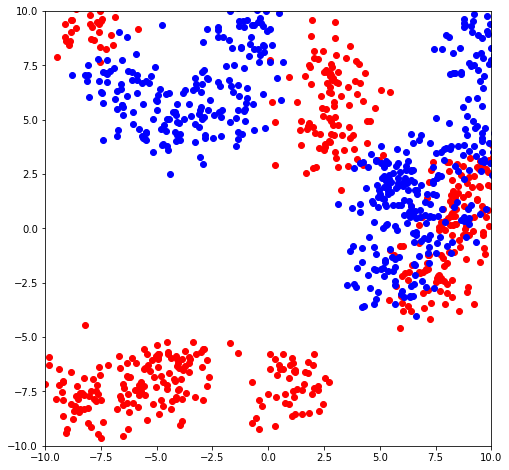

In [19]:
# Import necessary libraries
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

# Generate a toy example using sklearn
X, y = make_blobs(n_samples=1000, centers=20)
labels = ["r", "b"]
y = np.take(labels, (y < 10))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Plot the scatter plot of the data
plt.figure(figsize=(8, 8))
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

In [20]:
def plot_surface(clf, X, y, 
                 xlim=(-10, 10), ylim=(-10, 10), n_steps=250, 
                 subplot=None, show=True):
    """
    Plot the decision boundary of a classifier.

    Parameters
    ----------
    clf : Classifier object
        The classifier to use for prediction.
    X : ndarray, shape (n_samples, n_features)
        The input data.
    y : ndarray, shape (n_samples,)
        The target labels.
    xlim : tuple, optional (default=(-10, 10))
        The limits of the x-axis.
    ylim : tuple, optional (default=(-10, 10))
        The limits of the y-axis.
    n_steps : int, optional (default=250)
        The number of steps to use in each direction for creating the grid.
    subplot : tuple, optional (default=None)
        The subplot configuration.
    show : bool, optional (default=True)
        Whether to show the plot.

    Returns
    -------
    None
    """
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)
        
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps), 
                         np.linspace(ylim[0], ylim[1], n_steps))
    
    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    
    if show:
        plt.show()

def plot_clf(clf, X, y):
    """
    Plot the decision boundary of a classifier.

    Parameters
    ----------
    clf : Classifier object
        The classifier to use for prediction.
    X : ndarray, shape (n_samples, n_features)
        The input data.
    y : ndarray, shape (n_samples,)
        The target labels.

    Returns
    -------
    None
    """
    plt.figure(figsize=(16, 8))
    plot_surface(clf, X, y, subplot=(1, 2, 1), show=False)

Iteration 1, loss = 0.60760445
Iteration 2, loss = 0.50415369
Iteration 3, loss = 0.47959651
Iteration 4, loss = 0.45114194
Iteration 5, loss = 0.42774547
Iteration 6, loss = 0.40674602
Iteration 7, loss = 0.38801358
Iteration 8, loss = 0.36935719
Iteration 9, loss = 0.35197422
Iteration 10, loss = 0.33506716
Iteration 11, loss = 0.31918976
Iteration 12, loss = 0.30358508
Iteration 13, loss = 0.28917336
Iteration 14, loss = 0.28455797
Iteration 15, loss = 0.27007717
Iteration 16, loss = 0.26037664
Iteration 17, loss = 0.25103328
Iteration 18, loss = 0.24921832
Iteration 19, loss = 0.24204426
Iteration 20, loss = 0.23320963
Iteration 21, loss = 0.23140536
Iteration 22, loss = 0.22465352
Iteration 23, loss = 0.23251825
Iteration 24, loss = 0.22927711
Iteration 25, loss = 0.23237441
Iteration 26, loss = 0.23314919
Iteration 27, loss = 0.22556574
Iteration 28, loss = 0.22766827
Iteration 29, loss = 0.21213210
Iteration 30, loss = 0.22194218
Iteration 31, loss = 0.22190146
Iteration 32, los

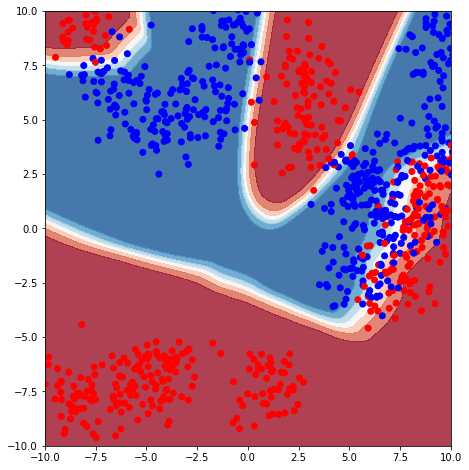

In [21]:
from sklearn.neural_network import MLPClassifier
# Train the neural network classifier with 3 hidden layers of 200 neurons each
clf = MLPClassifier(hidden_layer_sizes=(200, 200, 200), activation="relu", learning_rate="invscaling", verbose=True)
clf.fit(X, y)
plot_clf(clf, X, y)

Accuracy: 0.8966666666666666


/opt/miniconda3/envs/ee2211/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


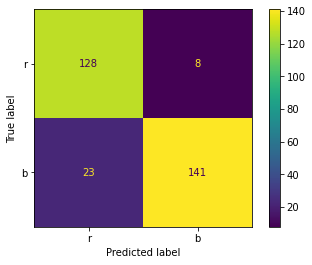

In [24]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
# Print the accuracy of the model on the testing set
print("Accuracy:", clf.score(X_test, y_test))
# Print the confusion matrix of the model on the testing set
plot_confusion_matrix(clf, X_test, y_test, labels=labels)
plt.show()